In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from Sections import Section
from flatsurf import *
import sympy as sym
from sympy import solve, lambdify
from sympy import integrate
import numpy as np
from scipy.integrate import nquad
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
import os

In [2]:
dx = 0.005
x_vals = np.arange(dx,1+dx,dx)
saddle_dict = {}
saddle_dict["x"] = []
saddle_dict["y"] = []
saddle_dict["lab"] = []
label_dict = {}
vecs = [np.array([[1 + 2**0.5], [1]]), np.array([[1 + 2**0.5], [2**0.5]]), np.array([[1], [1]]), np.array([[0],[1]])]
#diag = 1 - x
for i in range(len(vecs)):
    label_dict[i] = vecs[i]
vecs

[array([[2.41421356],
        [1.        ]]),
 array([[2.41421356],
        [1.41421356]]),
 array([[1],
        [1]]),
 array([[0],
        [1]])]

In [3]:
for a in x_vals:
    y_vals = np.arange(1 - (2 + 2**0.5)*a + dx / 10, 1, dx)
    for b in y_vals:
        winner_slope = None
        winner = None
        Mab = np.array([[a, b], [0, 1/a]])
        for vec in vecs:
            new = Mab@vec
            if float(new[0]) == 0:
                continue
            x = float(new[0])
            y = float(new[1])
            if x <= 1 and x >= 0:
                if winner_slope == None:
                    winner_slope = y/x
                    winner = vec
                    continue
                if y/x <= winner_slope:
                    winner_slope = y/x
                    winner = vec

        saddle_dict["x"].append(a)
        saddle_dict["y"].append(b)
        for i in range(len(vecs)):
            if np.array_equal(winner, vecs[i]):
                saddle_dict["lab"].append(i)
        

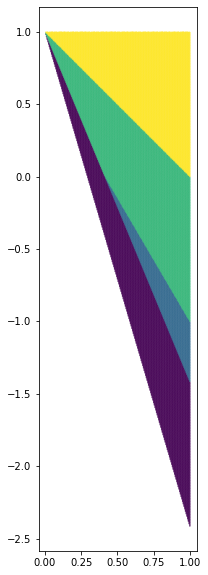

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(saddle_dict["x"],saddle_dict["y"], c = saddle_dict["lab"], s = 0.1)
ax.set_aspect('equal', adjustable='box')

In [5]:
df = pd.DataFrame.from_dict(saddle_dict)

In [6]:
set(saddle_dict["lab"])

{0, 1, 2, 3}

In [7]:
sec_list = []
triangle = True
diagonal = False

lab_order = list(df[df["x"] == 1 - dx]["lab"])
labs = []
for lab in lab_order:
    if lab not in labs:
        labs.append(lab)
        
for lab in labs:
    sec = Section()
    df1 = df[df["lab"] == lab]
    vector = label_dict[lab]
    
    min_x = min(df1["x"])
    y1 = min(df1[df1["x"] == min_x]["y"])
    
    max_x = max(df1["x"])
    y2 = max(df1[df1["x"] == max_x]["y"])
    y3 = min(df1[df1["x"] == max_x]["y"])
    
    sec.add_point([min_x, y1])
    sec.add_point([max_x, y2])
    sec.add_point([max_x, y3])
    sec.vec = vector
    sec.dx = dx
    
    if triangle == False:
        i = len(sec_list) - 1
        
        if abs(sec.line(sec.points[0], sec_list[i].points[0])[0] - sec.line(sec_list[i].points[0], sec.points[2])[0]) >= 4*dx + dx:
            sec.add_point(sec_list[i].points[0])
        if i != 0:
            if diagonal != True:
                if abs(sec_list[i-1].line(sec_list[i - 1].points[0], sec_list[i].points[0])[0] - sec.line(sec_list[i].points[0], sec_list[i - 1].points[1])[0]) >= 4*dx + dx:
                    sec_list[i - 1].points.insert(1, sec_list[i].points[0])
        
        triangle = True
        diagonal = False
        
    if min_x != dx:
        triangle = False
        if y1 - (1 - (2 + 2**0.5) * min_x) <= 4*dx:
            diagonal = True
    
    sec_list.append(sec)

In [12]:
sec_list[3].output()

function of y: 1/(t*x)
times: [1.00372740432161, 4.00861304346244, 10]
top: [1]
bottom: [1 - 1.00215326086561*x]
